# Temperature Forecast Project using ML

##### Problem Statement:
- This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

##### Target variable:
- Next_Tmax: Next day maximum temperature
- Next_Tmin: Next day  minimum temperature

In [39]:
# Importing libraries

import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [40]:
## Read the CSV file and convert into dataframe

df = pd.read_csv('temperature.csv')
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [41]:
df.shape ## checking the data dimensions for the original dataset

(7752, 25)

- We have 7752 rows & 25 column in the dataset

In [42]:
df.describe() #  understanding the data at high level. checking the statistics of data set

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7750.000000   7682.000000   7682.000000  7677.000000  7677.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.211568      2.969999      2.413961    14.668111     7.192004   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    45.963543    84.222862   
50%      13.000000     29.900000     23.400000    55.039024    89.793480   
75%      19.000000     32.000000     24.900000    67.190056    93.743629   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7677.000000       7677.000000  7677.000000  7677.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.947191          2.345347     2.183836    33.730589   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673499         22.089739     5.678705    37.266753   
50%           29.703426         23.760199     6.547470    56.865482   
75%           31.710450         25.152909     8.032276    84.223616   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7677.000000  ...  7677.000000  7677.000000  7677.000000  7752.000000   
mean      0.368774  ...     0.485003     0.278200     0.269407    37.544722   
std       0.262458  ...     1.762807     1.161809     1.206214     0.050352   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.146654  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.315697  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.575489  ...     0.018364     0.007896     0.000041    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

               lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7752.000000  7752.000000  7752.000000      7752.000000  7725.000000   
mean    126.991397    61.867972     1.257048      5341.502803    30.274887   
std       0.079435    54.279780     1.370444       429.158867     3.128010   
min     126.826000    12.370000     0.098475      4329.520508    17.400000   
25%     126.937000    28.700000     0.271300      4999.018555    28.200000   
50%     126.995000    45.716000     0.618000      5436.345215    30.500000   
75%     127.042000    59.832400     1.767800      5728.316406    32.600000   
max     127.135000   212.335000     5.178230      5992.895996    38.900000   

         Next_Tmin  
count  7725.000000  
mean     22.932220  
std       2.487613  
min      11.300000  
25%      21.300000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

- There are null values present in the dataset.
- There are 0 values for min, 25% quartile & 50% quartile in LDAPS_PPT2, LDAPS_PPT3 & LDAPS_PPT4.
- For min & max, Present_Tmin is almost same as Next_Tmin.

In [43]:
## checking the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


-Only date is object dtype

In [44]:
df.isnull().sum() ## checking for null vales

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

- There are NaNs in most of the columns.

In [45]:
df.isnull().mean() ## checking % of the null values

station             0.000258
Date                0.000258
Present_Tmax        0.009030
Present_Tmin        0.009030
LDAPS_RHmin         0.009675
LDAPS_RHmax         0.009675
LDAPS_Tmax_lapse    0.009675
LDAPS_Tmin_lapse    0.009675
LDAPS_WS            0.009675
LDAPS_LH            0.009675
LDAPS_CC1           0.009675
LDAPS_CC2           0.009675
LDAPS_CC3           0.009675
LDAPS_CC4           0.009675
LDAPS_PPT1          0.009675
LDAPS_PPT2          0.009675
LDAPS_PPT3          0.009675
LDAPS_PPT4          0.009675
lat                 0.000000
lon                 0.000000
DEM                 0.000000
Slope               0.000000
Solar radiation     0.000000
Next_Tmax           0.003483
Next_Tmin           0.003483
dtype: float64

- We have less % of null values in each column, Lets validate how these values are co related to target variable & accordingly we would fix the null values.

In [46]:
## Divide data set into features and label for Next_Tmax.

y = df['Next_Tmax']
x = df.drop(columns=['Next_Tmax'])

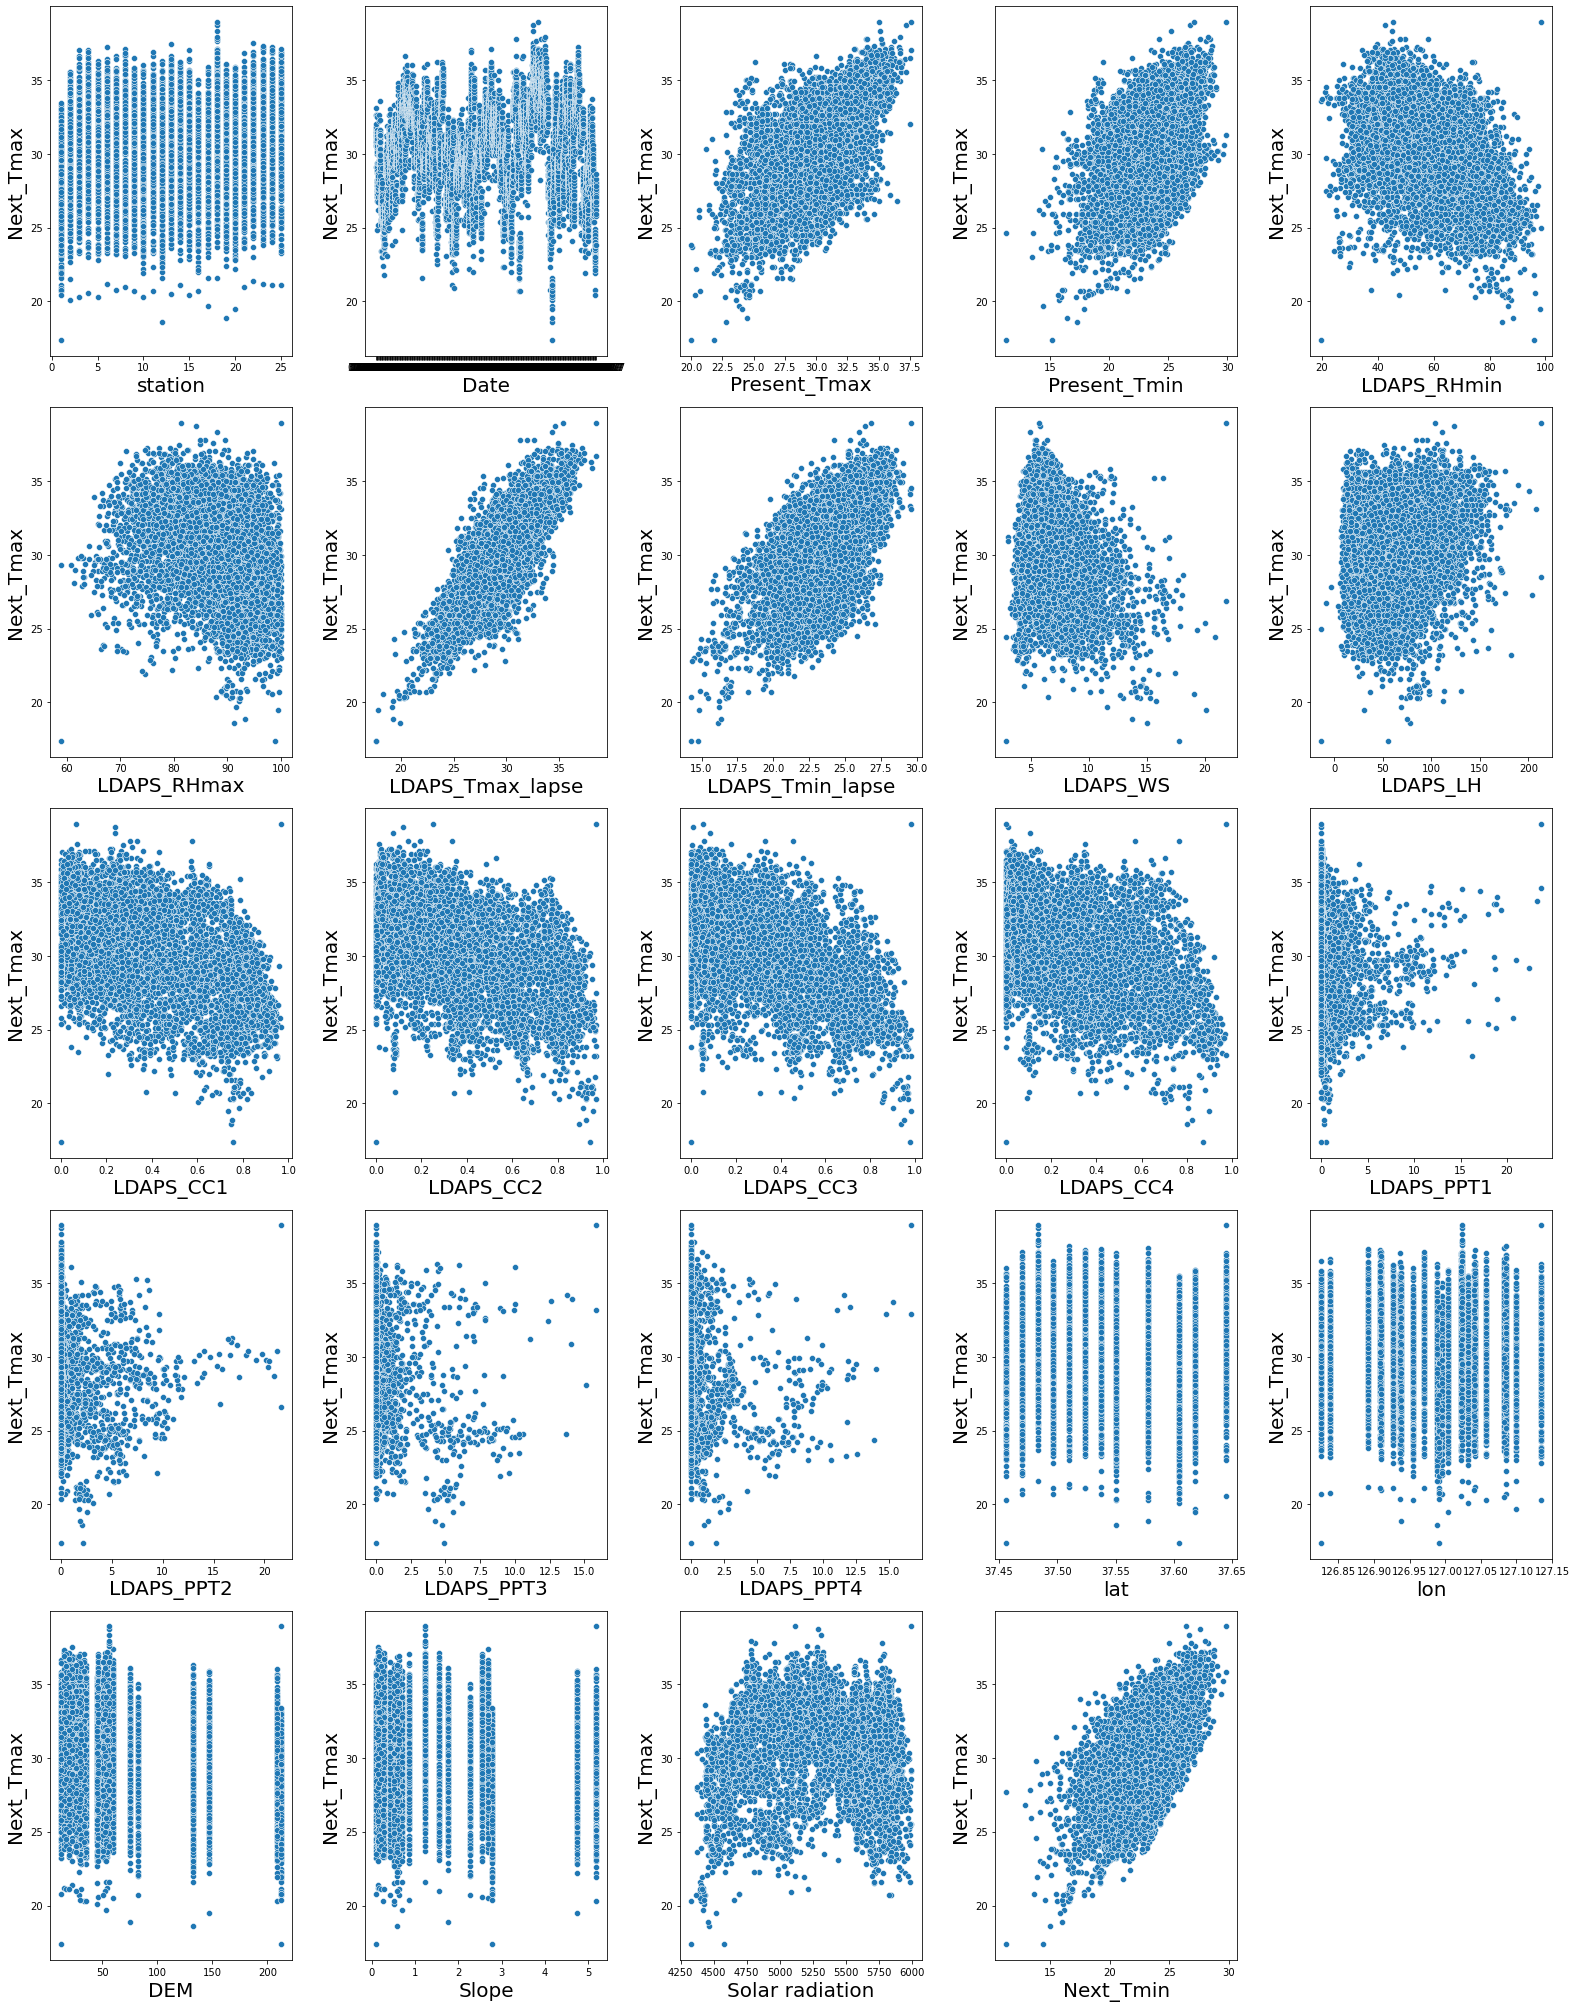

In [47]:
## Visualizing the relationship for Next_tmax.

plt.figure(figsize=(22,28), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=25:
        ax = plt.subplot(5,5,plotnumber)
        sns.scatterplot(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Next_Tmax', fontsize =20)
    
    plotnumber+=1
plt.tight_layout()

- Present_Tmax, Present_tmin, LDAPS_Tmax_lapse & LDAPS_Tmin_lapse & Next_Tmin have good positive corelation with Next_Tmax.
- LDAPS_RHmin, LDAPS_CC4, LDAPS_CC1, LDAPS_CC2 and LDAPS_CC3 have good negative corelation with Next_Tmax.

In [48]:
## Divide data set into features and label for Next_Tmin.

y = df['Next_Tmin']
x = df.drop(columns=['Next_Tmin'])

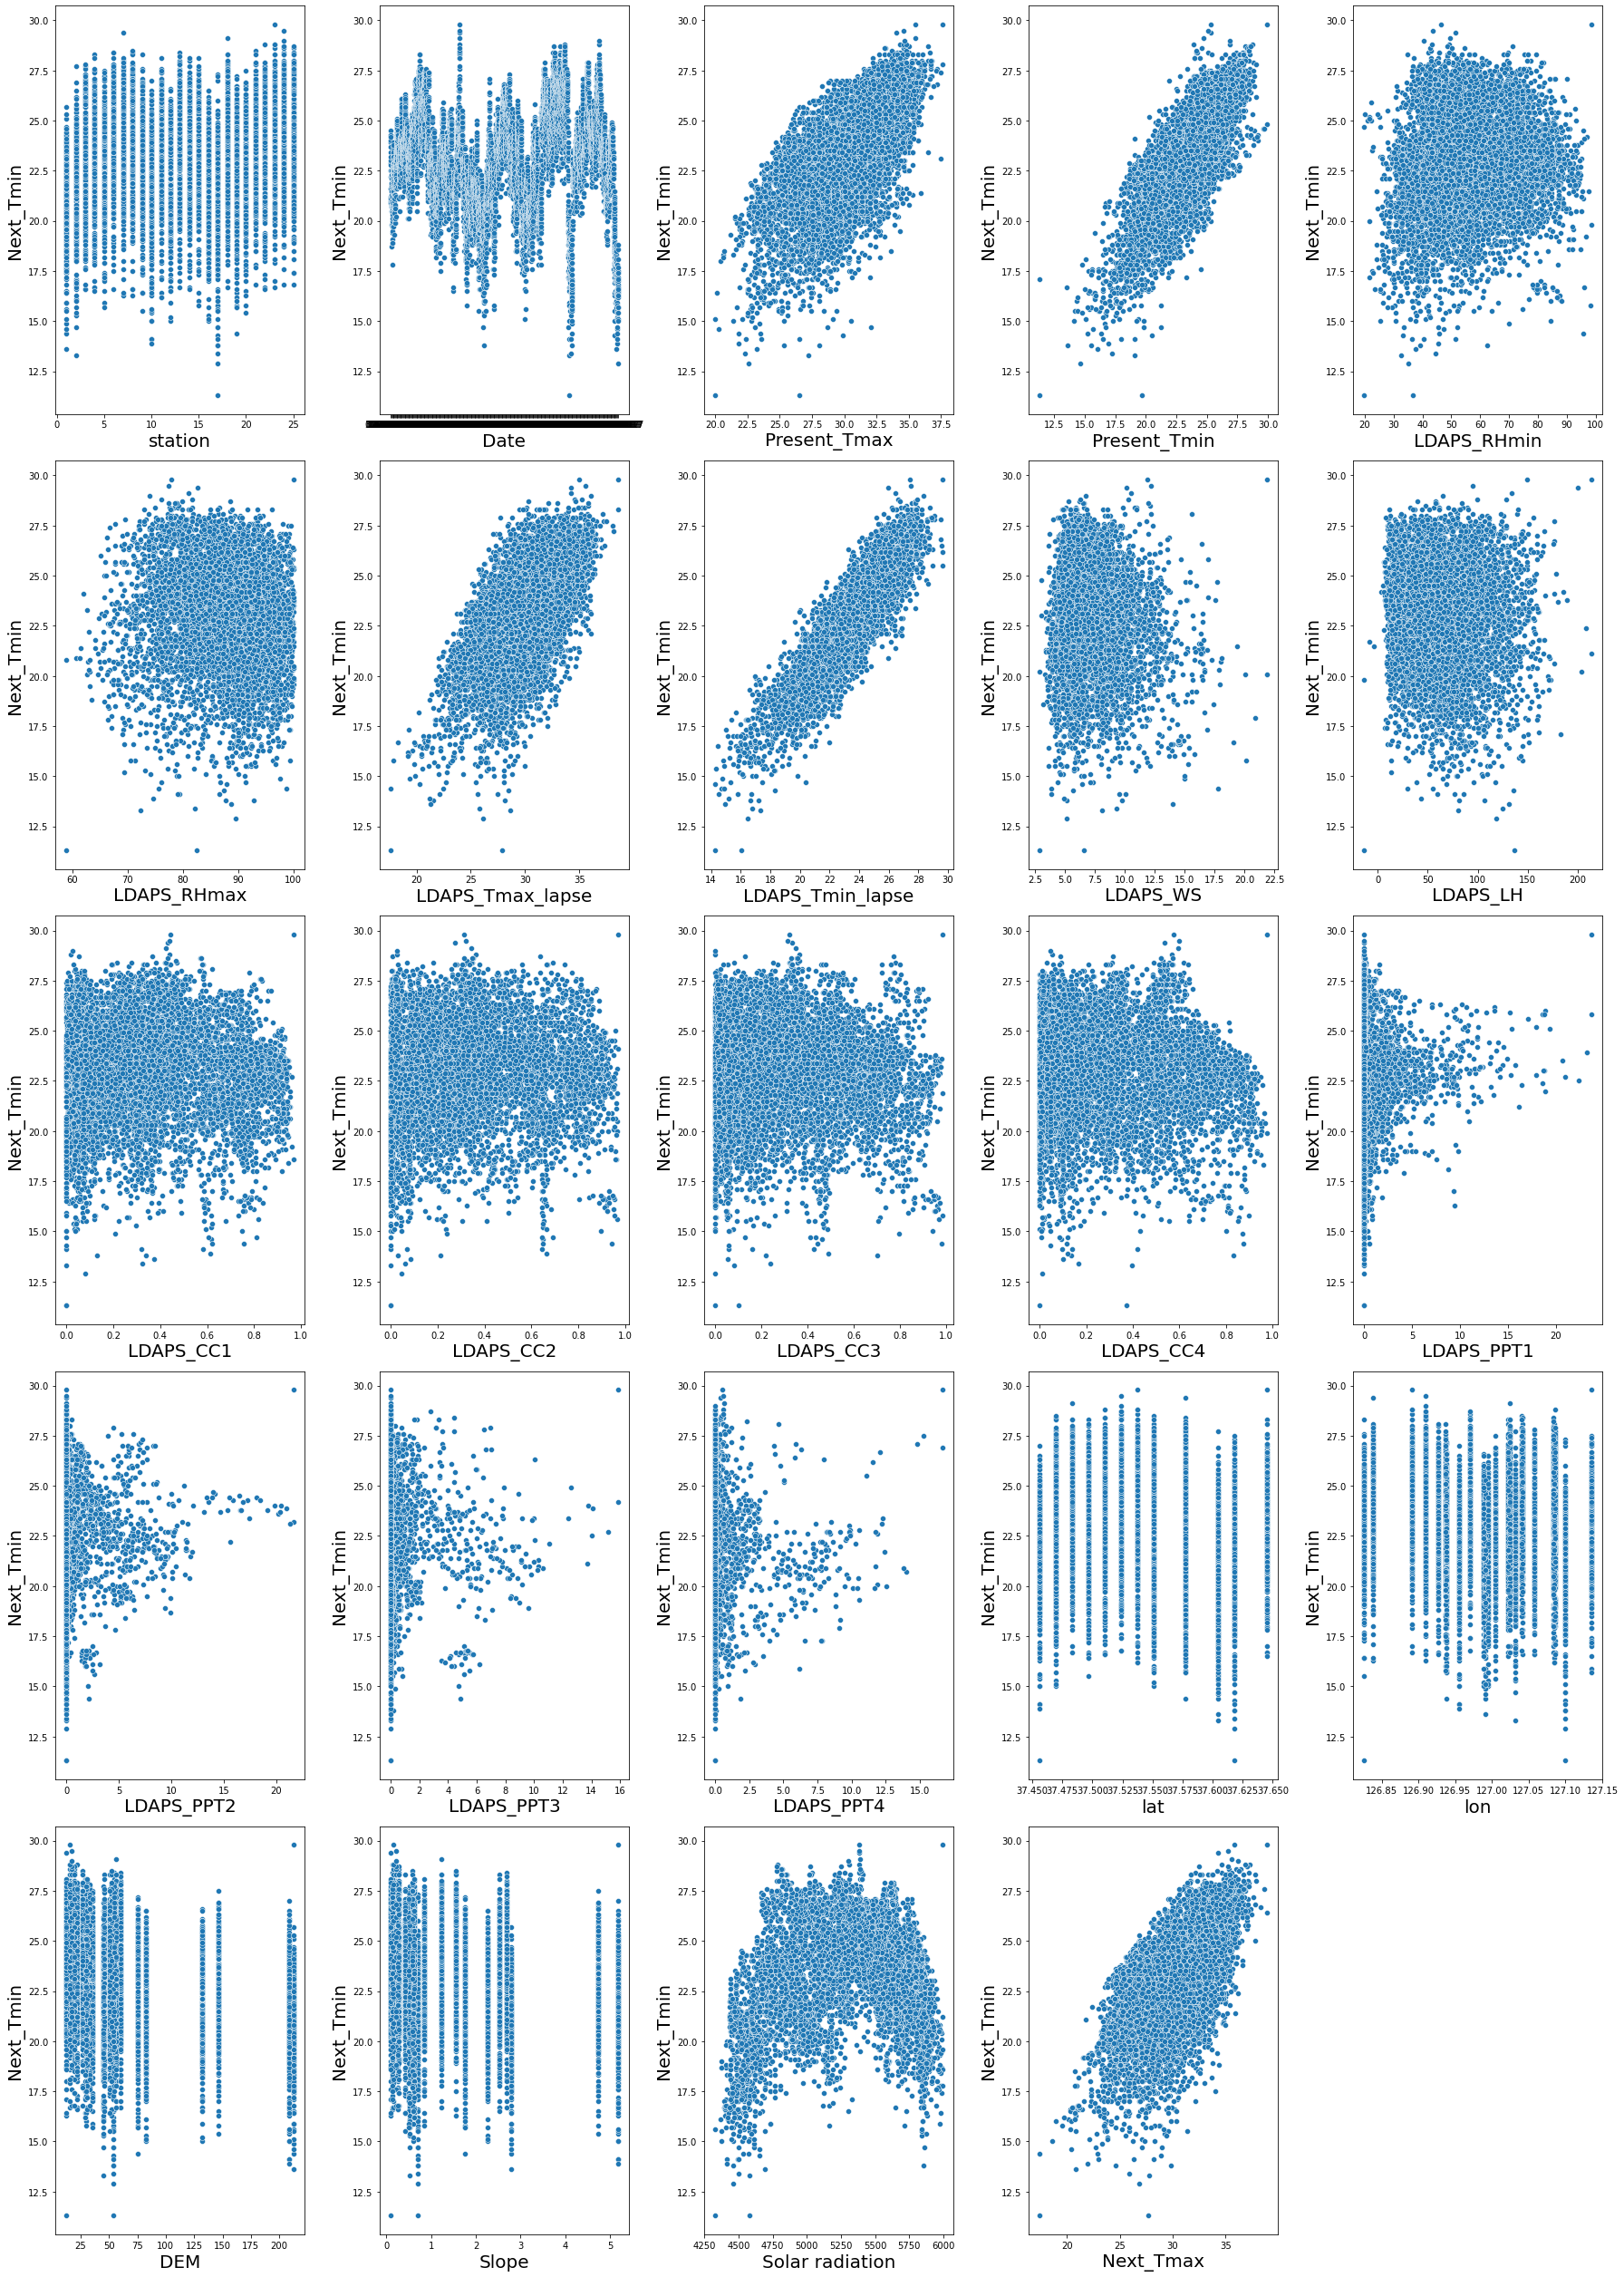

In [49]:
## Visualizing the relationship for Next_tmin.

plt.figure(figsize=(25,35), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=25:
        ax = plt.subplot(5,5,plotnumber)
        sns.scatterplot(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Next_Tmin', fontsize =20)
    
    plotnumber+=1
plt.tight_layout()

- Present_Tmax, Present_tmin, LDAPS_RHmin, LDAPS_Tmax_lapse & LDAPS_Tmin_lapse & Next_Tmin have good positive corelation with Next_Tmin.

###### Lets check the target variables how it is distributed

<AxesSubplot:xlabel='Next_Tmax', ylabel='Count'>

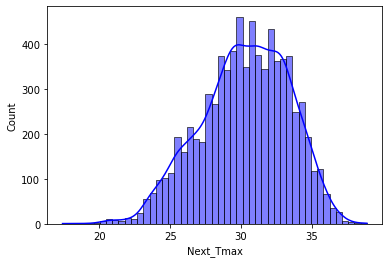

In [50]:
sns.histplot(df['Next_Tmax'],kde=True,color='b')

- It has having skewness & the maximum temparature distribution is lies between 23 to 38.

<AxesSubplot:xlabel='Next_Tmin', ylabel='Count'>

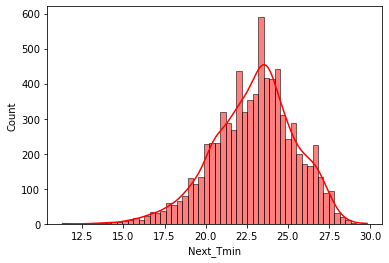

In [51]:
sns.histplot(df['Next_Tmin'],kde=True,color='r')

- It has having skewness & the minimum temparature distribution is lies between 15 to 28.

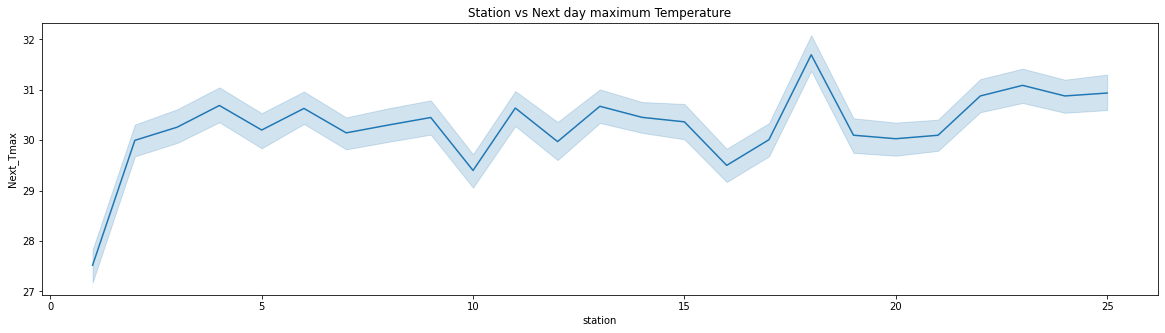

In [52]:
# Lets check the distribution of Station vs Next day maximum Temperature.
plt.figure(figsize=(20,5))
plt.title('Station vs Next day maximum Temperature')
sns.lineplot(x='station',y='Next_Tmax',data=df)
plt.show()

- It shows how frequency of temperature changes based on station.
- Station 18 has highest temperature.

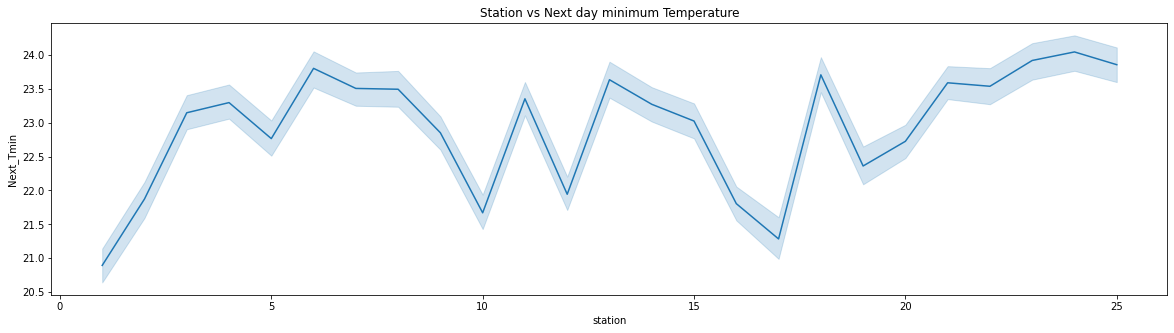

In [53]:
# Lets check the distribution of Station vs Next day minimam Temperature.
plt.figure(figsize=(20,5))
plt.title('Station vs Next day minimum Temperature')
sns.lineplot(x='station',y='Next_Tmin',data=df)
plt.show()

- It shows how frequency of temperature changes based on station.
- Station 17 has lowest  temperature.

As we have seen all the rows having null values are somewhere related to the both target variables. Also we have less% of NaNs, so lets fillna with the mean.

In [54]:
df.replace(np.NaN,df.mean(), inplace=True)

<AxesSubplot:>

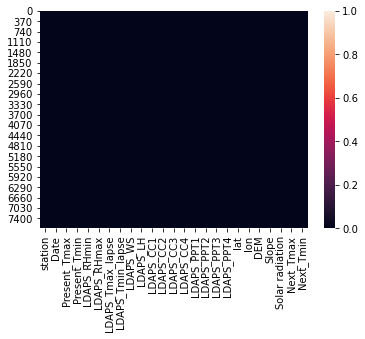

In [55]:
sns.heatmap(df.isnull()) #Looking for null values if any, in heatmap

In [56]:
# Converting date into datetime
df["Date"] = pd.to_datetime(df["Date"], errors = "coerce")

In [57]:
df["Date_month"] = df["Date"].dt.month
df["Date_day"] = df["Date"].dt.day

In [58]:
df.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT4  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

       lat      lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  \
0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1       21.2   
1  37.6046  127.032   44.7624  0.5141      5869.312500       30.5       22.5   
2  37.5776  127.058   33.3068  0.2661      5863.555664       31.1       23.9   
3  37.6450  127.022   45.7160  2.5348      5856.964844       31.7       24.3   
4  37.5507  127.135   35.0380  0.5055      5859.552246       31.2       22.5   

   Date_month  Date_day  
0         6.0      30.0  
1         6.0      30.0  
2         6.0      30.0  
3         6.0      30.0  
4         6.0      30.0  

[5 rows x 27 columns]

In [59]:
df.drop(columns=['Date'], inplace= True) ## dropping date column as we have month & day column separetely

In [60]:
df['Date_month']=df['Date_month'].fillna(df['Date_month'].mean())
df['Date_day']=df['Date_day'].fillna(df['Date_day'].mean())

In [61]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Date_month          0
Date_day            0
dtype: int64

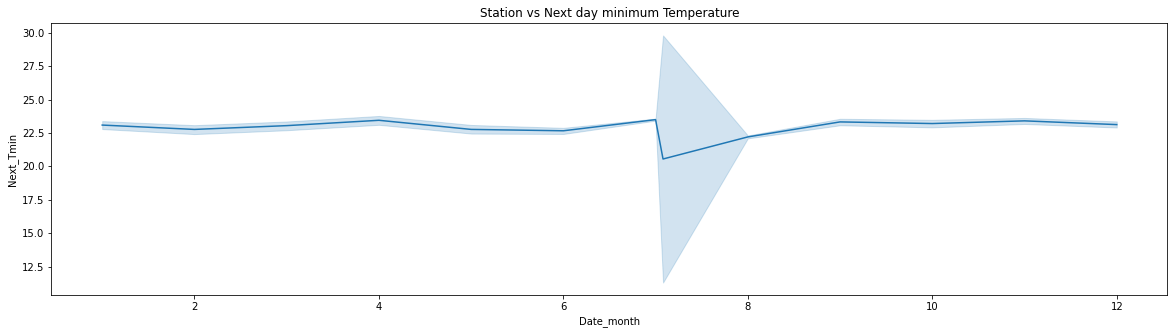

In [62]:
# Lets check the distribution of month vs Next day minimam Temperature.
plt.figure(figsize=(20,5))
plt.title('Station vs Next day minimum Temperature')
sns.lineplot(x='Date_month',y='Next_Tmin',data=df)
plt.show()

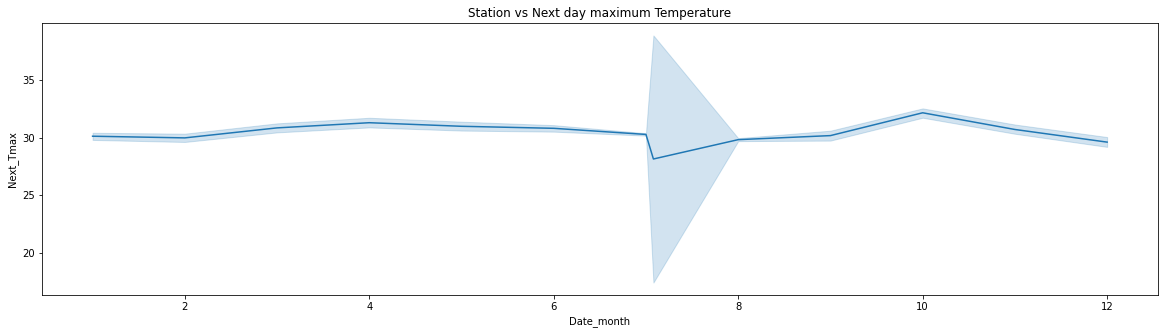

In [63]:
# Lets check the distribution of month vs Next day maximum Temperature.
plt.figure(figsize=(20,5))
plt.title('Station vs Next day maximum Temperature')
sns.lineplot(x='Date_month',y='Next_Tmax',data=df)
plt.show()

In [64]:
df.dtypes

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
Date_month          float64
Date_day            float64
dtype: object

###### Lets check the corelation again to visualize the feature importance

In [65]:
# checking correlation
corr_mat= df.corr()
corr_mat

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000e+00      0.112655      0.131646    -0.066733   
Present_Tmax      1.126554e-01      1.000000      0.618760    -0.204571   
Present_Tmin      1.316462e-01      0.618760      1.000000     0.123143   
LDAPS_RHmin      -6.673316e-02     -0.204571      0.123143     1.000000   
LDAPS_RHmax      -1.669845e-01     -0.301787     -0.015140     0.579141   
LDAPS_Tmax_lapse  6.910718e-02      0.570129      0.464151    -0.564580   
LDAPS_Tmin_lapse  1.047582e-01      0.623496      0.762993     0.089476   
LDAPS_WS          5.277000e-03     -0.121820     -0.034675     0.294361   
LDAPS_LH         -1.333566e-01      0.135463     -0.009258    -0.070858   
LDAPS_CC1         6.918787e-03     -0.311805      0.084447     0.613818   
LDAPS_CC2         3.396039e-03     -0.213791      0.090263     0.745443   
LDAPS_CC3         6.940187e-04     -0.144018     -0.002772     0.689679   
LDAPS_CC4         6.126001e-03     -0.140729     -0.044335     0.514075   
LDAPS_PPT1       -2.709482e-03     -0.109006      0.112845     0.262665   
LDAPS_PPT2       -8.249548e-03     -0.099449      0.068176     0.390967   
LDAPS_PPT3       -1.246113e-02     -0.120367     -0.046126     0.240642   
LDAPS_PPT4       -1.040127e-02     -0.099607     -0.062965     0.168595   
lat              -2.375015e-01     -0.052615     -0.078475     0.087099   
lon              -1.187044e-01      0.009020     -0.043461    -0.076237   
DEM              -2.558297e-01     -0.187121     -0.250275     0.102115   
Slope            -9.006090e-02     -0.105809     -0.146339     0.123744   
Solar radiation  -1.900100e-02     -0.025439      0.053578     0.244080   
Next_Tmax         1.079826e-01      0.610348      0.471806    -0.437898   
Next_Tmin         1.282934e-01      0.622741      0.796670     0.095019   
Date_month       -2.341773e-17     -0.001151     -0.003434    -0.053940   
Date_day          3.184397e-17     -0.143807     -0.108272    -0.065837   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.166984          0.069107          0.104758  0.005277   
Present_Tmax        -0.301787          0.570129          0.623496 -0.121820   
Present_Tmin        -0.015140          0.464151          0.762993 -0.034675   
LDAPS_RHmin          0.579141         -0.564580          0.089476  0.294361   
LDAPS_RHmax          1.000000         -0.373404         -0.114143  0.135333   
LDAPS_Tmax_lapse    -0.373404          1.000000          0.654021 -0.311996   
LDAPS_Tmin_lapse    -0.114143          0.654021          1.000000 -0.130035   
LDAPS_WS             0.135333         -0.311996         -0.130035  1.000000   
LDAPS_LH             0.238579          0.048010         -0.134761  0.006711   
LDAPS_CC1            0.436652         -0.438439          0.010901  0.289445   
LDAPS_CC2            0.391330         -0.523619          0.047727  0.261090   
LDAPS_CC3            0.226957         -0.541327         -0.044018  0.242991   
LDAPS_CC4            0.130619         -0.429539         -0.080335  0.220533   
LDAPS_PPT1           0.268449         -0.111065          0.038056  0.152587   
LDAPS_PPT2           0.229050         -0.242122          0.000870  0.191886   
LDAPS_PPT3           0.134607         -0.188115         -0.088575  0.161684   
LDAPS_PPT4           0.117853         -0.160273         -0.094655  0.144085   
lat                  0.195798         -0.042093         -0.096257  0.036657   
lon                  0.025667          0.090666         -0.026701 -0.059466   
DEM                  0.177168         -0.178895         -0.195455  0.191053   
Slope                0.219599         -0.162332         -0.185849  0.171629   
Solar radiation      0.149261          0.047971          0.159975  0.121759   
Next_Tmax           -0.283738          0.827189          0.586983 -0.342729   
Next_Tmin           -0.071997          0.586868          0.880176 -0.096576   
Date_month          -0

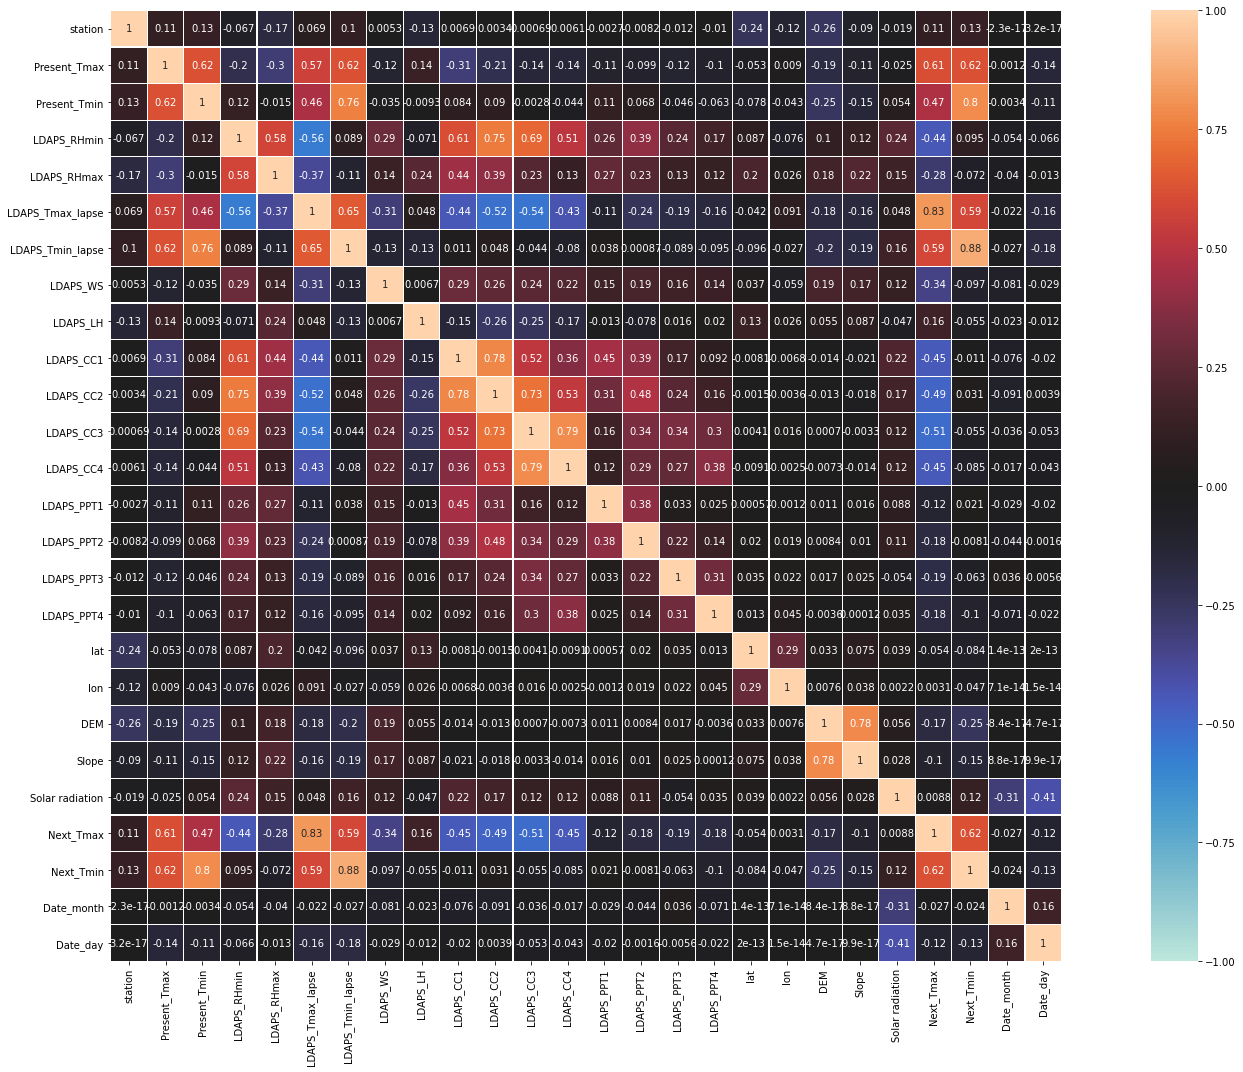

In [66]:
## visualizing the correlation in heat map to check if there is any coefficient of multicolinearity
plt.figure(figsize=(25,15))
sns.heatmap(corr_mat, vmin=-1, vmax=1, annot= True, square= True, center= 0, fmt= '.2g', linewidths= .1)
plt.tight_layout()

- Present_Tmax, Present_Tmin, LDAPS_Tmax_lapse, Next_Tmin and LDAPS_Tmin_lapse have good positive corelation with Next_Tmax.
- LDAPS_RHmin, LDAPS_CC4, LDAPS_CC1, LDAPS_CC2 and LDAPS_CC3 have good negative corelation with Next_Tmax.
- LDAPS_Tmin_lapse,Present_Tmin,Present_Tmax,Next_Tmax and LDAPS_Tmax_lapse have good positive corelation with Next_Tmin

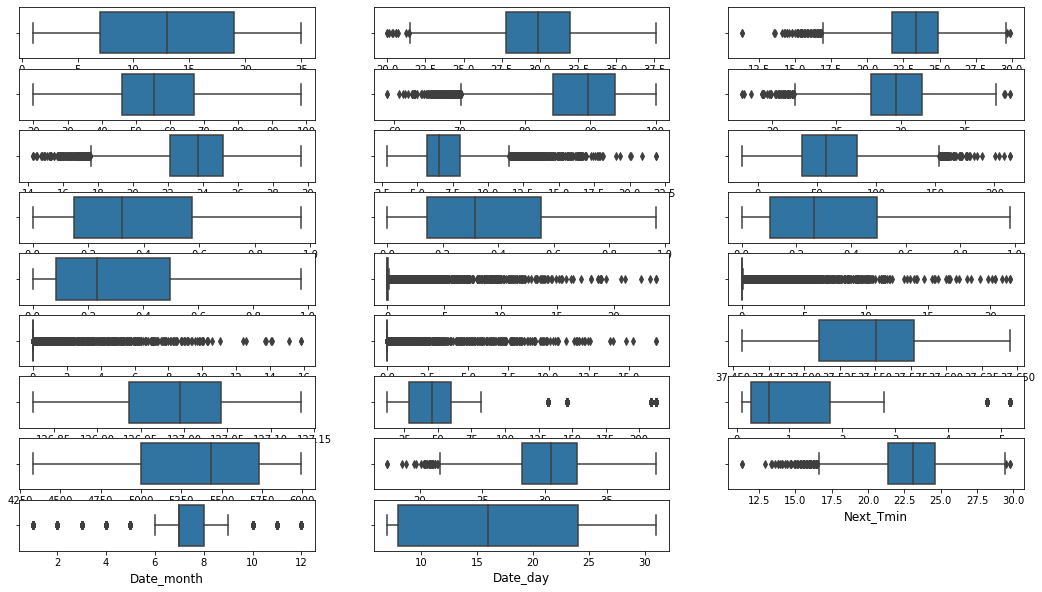

In [67]:
# lets visualize the outliers using box plot
plt.figure(figsize=(18,10))
graph = 1

for column in df:
    if graph<=27:
        ax = plt.subplot(9,3,graph)
        sns.boxplot(df[column], orient='v')
        plt.xlabel(column,fontsize=12)
    
    graph+=1
plt.show()

###### Removing outliers using zscore

In [68]:
#Function to choose the right threshold
def threshold(z,d):
    for i in np.arange(3,5,0.2):
        data=d.copy()
        data=data[(z<i).all(axis=1)]
        loss=(d.shape[0]-data.shape[0])/d.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2))) 

In [69]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold(z,df)


With threshold 3.0 data loss is 11.07%
With threshold 3.2 data loss is 9.51%
With threshold 3.4 data loss is 8.36%
With threshold 3.6 data loss is 7.55%
With threshold 3.8 data loss is 6.88%
With threshold 4.0 data loss is 6.22%
With threshold 4.2 data loss is 5.79%
With threshold 4.4 data loss is 5.19%
With threshold 4.6 data loss is 4.72%
With threshold 4.8 data loss is 4.36%


In [70]:
data = df[(z<4.2).all(axis = 1)]

In [71]:
print ("shape before and after")
print ("shape befor" .ljust(20), ":", df.shape)
print ("shape after" .ljust(20), ":", data.shape)
print ("Percentage loss" .ljust(20), ":", (df.shape[0]-data.shape[0])/df.shape[0]*100)

shape before and after
shape befor          : (7752, 26)
shape after          : (7303, 26)
Percentage loss      : 5.792053663570691


##### Checking skewness

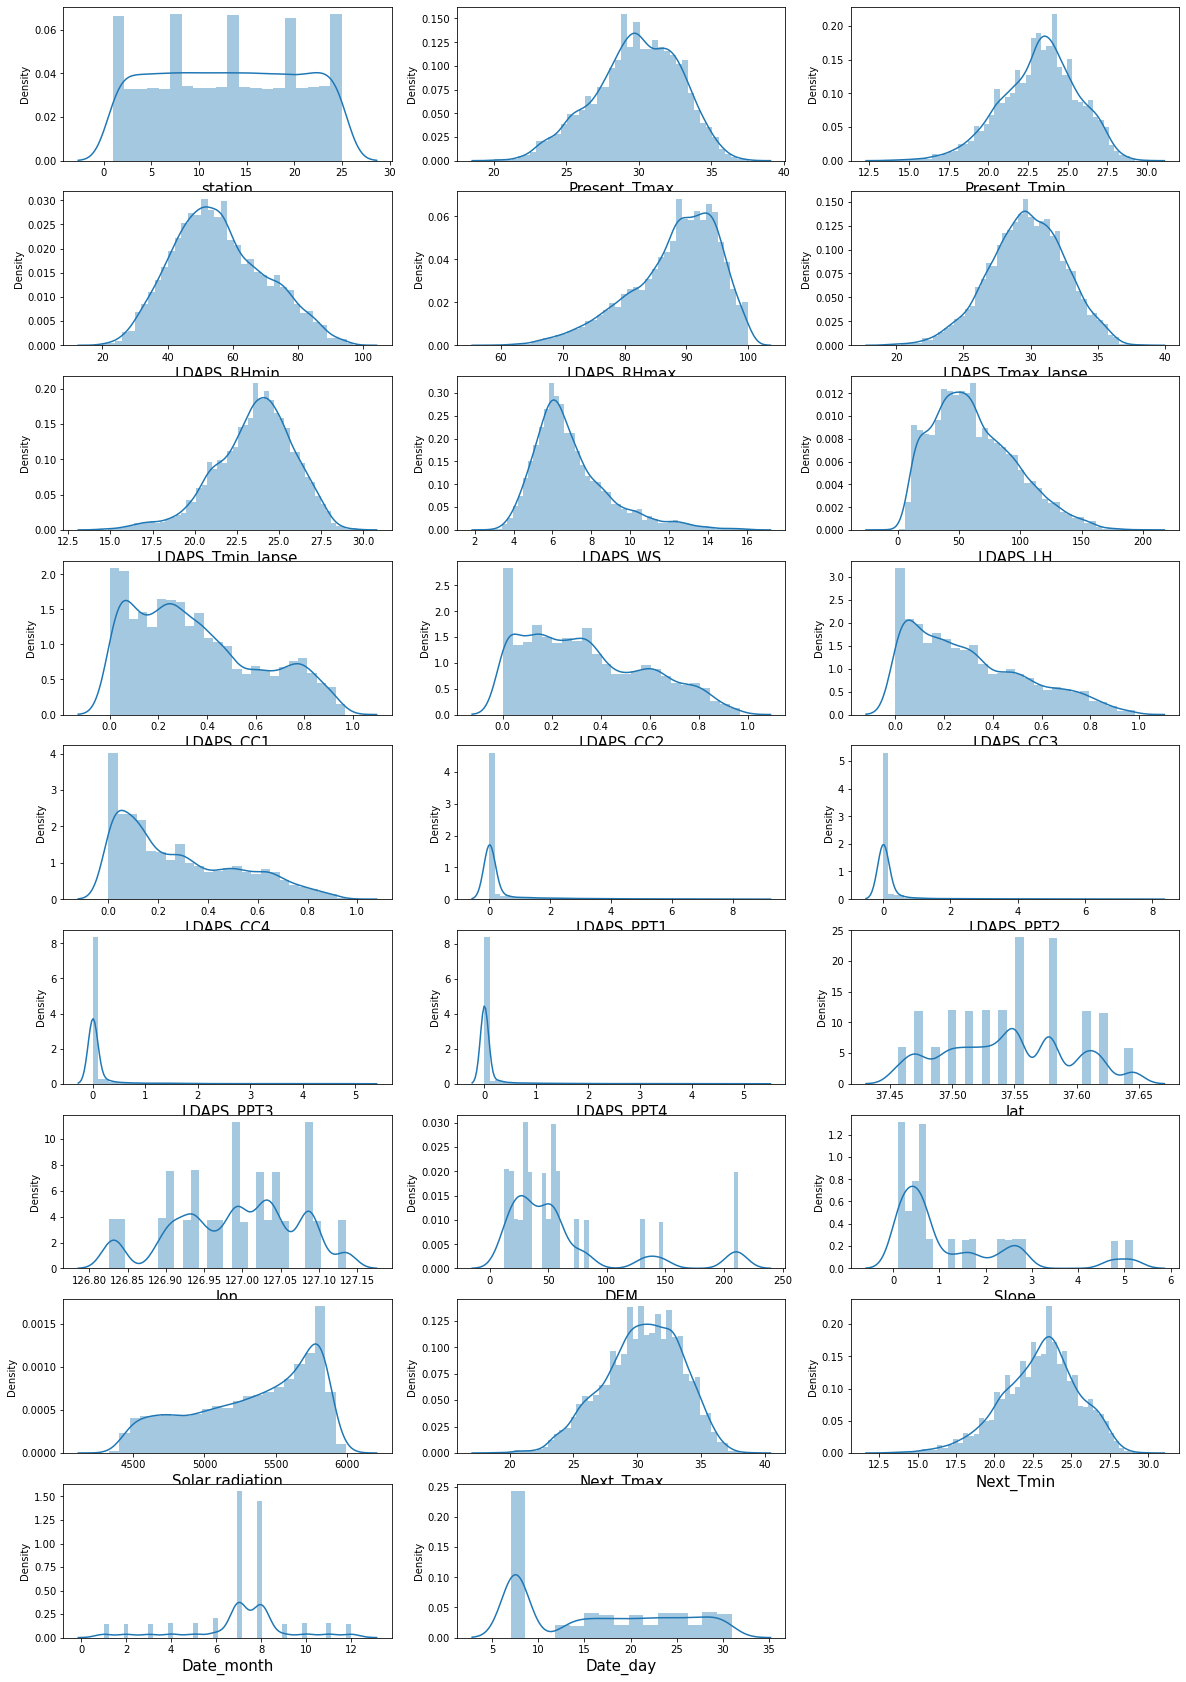

In [72]:
# lets plot distribution plot to visualize the skewness
plt.figure(figsize=(20,30))
plotnumber = 1

for column in data:
    if plotnumber<=27:
        ax = plt.subplot(9,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
    
    plotnumber+=1
plt.show()

In [73]:
data.skew()

station             0.000022
Present_Tmax       -0.307868
Present_Tmin       -0.364158
LDAPS_RHmin         0.319809
LDAPS_RHmax        -0.813192
LDAPS_Tmax_lapse   -0.209212
LDAPS_Tmin_lapse   -0.577156
LDAPS_WS            1.301463
LDAPS_LH            0.631931
LDAPS_CC1           0.537187
LDAPS_CC2           0.493402
LDAPS_CC3           0.696980
LDAPS_CC4           0.700162
LDAPS_PPT1          3.979428
LDAPS_PPT2          4.632891
LDAPS_PPT3          5.625622
LDAPS_PPT4          6.198933
lat                 0.092139
lon                -0.276179
DEM                 1.736082
Slope               1.581016
Solar radiation    -0.514677
Next_Tmax          -0.333664
Next_Tmin          -0.402436
Date_month         -0.694878
Date_day            0.239400
dtype: float64

- We have skewness on LDAPS_RHmax, LDAPS_WS, LDAPS_LH, LDAPS_CC3, LDAPS_CC4,LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, DEM,Slope, Date_month

In [74]:
# Using Power transformation to remove the skewness
from sklearn.preprocessing import power_transform
data[['LDAPS_RHmax','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4','DEM','Slope','Date_month','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']]=power_transform(
    data[['LDAPS_RHmax','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4','DEM','Slope','Date_month','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']],method='yeo-johnson')

In [75]:
data.skew()

station             0.000022
Present_Tmax       -0.307868
Present_Tmin       -0.364158
LDAPS_RHmin         0.319809
LDAPS_RHmax        -0.109457
LDAPS_Tmax_lapse   -0.209212
LDAPS_Tmin_lapse   -0.577156
LDAPS_WS            0.005737
LDAPS_LH           -0.020943
LDAPS_CC1           0.537187
LDAPS_CC2           0.493402
LDAPS_CC3           0.091624
LDAPS_CC4           0.133880
LDAPS_PPT1          1.465873
LDAPS_PPT2          1.676666
LDAPS_PPT3          1.829354
LDAPS_PPT4          2.087080
lat                 0.092139
lon                -0.276179
DEM                 0.039913
Slope               0.234810
Solar radiation    -0.514677
Next_Tmax          -0.333664
Next_Tmin          -0.402436
Date_month          0.045389
Date_day            0.239400
dtype: float64

In [76]:
data.shape

(7303, 26)

In [77]:
## Divide data set into features and label
y = data['Next_Tmax']
x = data.drop(columns=['Next_Tmax'], axis=1)

In [78]:
# lets scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)

In [79]:
pd.DataFrame(X_scaled).describe()

0            1            2            3            4   \
count  7303.000000  7303.000000  7303.000000  7303.000000  7303.000000   
mean      0.500799     0.559971     0.593695     0.468581     0.532760   
std       0.300379     0.166781     0.146342     0.184259     0.214668   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.250000     0.454545     0.500000     0.335053     0.376121   
50%       0.500000     0.568182     0.603659     0.449680     0.539787   
75%       0.750000     0.687500     0.695122     0.594634     0.697271   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                5            6            7            8            9   ...  \
count  7303.000000  7303.000000  7303.000000  7303.000000  7303.000000  ...   
mean      0.545644     0.604537     0.606189     0.715821     0.367361  ...   
std       0.147071     0.152003     0.148302     0.094679     0.264648  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.449448     0.513571     0.512859     0.650011     0.146409  ...   
50%       0.548201     0.619437     0.598928     0.714880     0.316233  ...   
75%       0.648742     0.710137     0.703263     0.784647     0.545579  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

                15           16           17           18           19  \
count  7303.000000  7303.000000  7303.000000  7303.000000  7303.000000   
mean      0.160883     0.138618     0.467167     0.533517     0.518373   
std       0.329947     0.316084     0.265342     0.257940     0.262034   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.286017     0.359223     0.366545   
50%       0.000000     0.000000     0.500530     0.546926     0.542578   
75%       0.042026     0.000000     0.643008     0.699029     0.635863   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                20           21           22           23           24  
count  7303.000000  7303.000000  7303.000000  7303.000000  7303.000000  
mean      0.457787     0.606039     0.596259     0.466167     0.391917  
std       0.310167     0.256777     0.146825     0.204499     0.344240  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.169368     0.406468     0.502959     0.439156     0.041667  
50%       0.398153     0.661385     0.609467     0.439156     0.375000  
75%       0.741041     0.835702     0.692308     0.539091     0.708333  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 25 columns]

In [80]:
y.head()

0    29.1
1    30.5
2    31.1
3    31.7
4    31.2
Name: Next_Tmax, dtype: float64

In [81]:
pd.DataFrame(X_scaled).head()

0         1         2         3         4         5         6   \
0  0.000000  0.494318  0.481707  0.498592  0.603196  0.459531  0.569132   
1  0.041667  0.676136  0.493902  0.420911  0.584523  0.551256  0.636121   
2  0.083333  0.659091  0.597561  0.374593  0.377182  0.563678  0.670697   
3  0.125000  0.681818  0.603659  0.498386  0.825528  0.543715  0.589934   
4  0.166667  0.647727  0.512195  0.471607  0.568452  0.513217  0.600379   

         7         8         9   ...   15   16        17        18        19  \
0  0.626257  0.747593  0.241862  ...  0.0  0.0  0.786017  0.533981  1.000000   
1  0.517603  0.698826  0.233137  ...  0.0  0.0  0.786017  0.666667  0.535013   
2  0.564445  0.583826  0.216426  ...  0.0  0.0  0.643008  0.750809  0.424894   
3  0.512912  0.737784  0.223692  ...  0.0  0.0  1.000000  0.634304  0.542578   
4  0.522379  0.836715  0.156529  ...  0.0  0.0  0.500530  1.000000  0.444310   

         20        21        22        23        24  
0  0.868224  1.000000  0.491124  0.345954  0.958333  
1  0.340817  0.925703  0.568047  0.345954  0.958333  
2  0.164960  0.922242  0.650888  0.345954  0.958333  
3  0.843869  0.918280  0.674556  0.345954  0.958333  
4  0.335709  0.919835  0.568047  0.345954  0.958333  

[5 rows x 25 columns]

###### Finding best Random_ state

In [82]:
maxr2score = 0
maxRS = 0

for i in range (1, 150):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.24, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predlr = LR.predict(x_test)
    r2 = r2_score(y_test, predlr)
    if r2>maxr2score:
        maxr2score = r2
        maxRS = i
print ('Max R2 score obtained is', maxr2score, 'on Random State', maxRS)

Max R2 score obtained is 0.8058579594150874 on Random State 12


###### Creating train test split

In [83]:
# Split the data into train and test. Model will be built on training data and tested on test data.
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.24, random_state=maxRS)
y_train.head()

7638    26.7
1871    30.2
3763    29.6
5306    29.3
4981    31.8
Name: Next_Tmax, dtype: float64

In [84]:
x_train.shape

(5550, 25)

In [85]:
y_train.shape

(5550,)

In [86]:
x_test.shape

(1753, 25)

In [87]:
y_test.shape

(1753,)

### LinearRegression

In [88]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_test=LR.predict(x_test)

print(r2_score(y_test,pred_test))

0.8058579594150874


### ## Decision Tree Regression

In [89]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_test=DTR.predict(x_test)

print(r2_score(y_test,pred_test))

0.8096636785527425


### RandomForestRegressor

In [90]:
from sklearn.ensemble import RandomForestRegressor
RFR= RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_test=RFR.predict(x_test)

print(r2_score(y_test,pred_test))

0.9111932514521679


### SupportVectorRegressor

In [91]:
from sklearn.svm import SVR
SV= SVR()
SV.fit(x_train,y_train)
pred_test=SV.predict(x_test)

print(r2_score(y_test,pred_test))

0.8781121650927783


### AdaBoostRegressor

In [92]:
from sklearn.ensemble import AdaBoostRegressor
ADR= AdaBoostRegressor()
ADR.fit(x_train,y_train)
pred_test=ADR.predict(x_test)

print(r2_score(y_test,pred_test))

0.7726000993287911


### BaggingRegressor

In [93]:
from sklearn.ensemble import BaggingRegressor
BR= BaggingRegressor()
BR.fit(x_train,y_train)
pred_test=BR.predict(x_test)

print(r2_score(y_test,pred_test))

0.8991777653887498


### GradientBoostingRegressor

In [94]:
from sklearn.ensemble import GradientBoostingRegressor
GBR= GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_test=GBR.predict(x_test)

print(r2_score(y_test,pred_test))

0.8636230574976117


## Cross Validation Score

In [96]:
from sklearn.model_selection import cross_val_score

In [97]:
scr = cross_val_score(LR, X_scaled, y, cv=5, scoring= 'r2')
print("Cross validation score for LinearRegression model:" , scr.mean())

Cross validation score for LinearRegression model: 0.7125890016293865


In [98]:
scr = cross_val_score(DTR, X_scaled, y, cv=5, scoring= 'r2')
print("Cross validation score for Decision Tree Regression:" , scr.mean())

Cross validation score for Decision Tree Regression: 0.43558316120142526


In [99]:
scr = cross_val_score(RFR, X_scaled, y, cv=5, scoring= 'r2')
print("Cross validation score for RandomForestRegressor:" , scr.mean())

Cross validation score for RandomForestRegressor: 0.6961629160037199


In [100]:
scr = cross_val_score(SV, X_scaled, y, cv=5, scoring= 'r2')
print("Cross validation score for SupportVectorRegressor:" , scr.mean())

Cross validation score for SupportVectorRegressor: 0.6982565562464076


In [101]:
scr = cross_val_score(ADR, X_scaled, y, cv=5, scoring= 'r2')
print("Cross validation score for AdaBoostRegressor:" , scr.mean())

Cross validation score for AdaBoostRegressor: 0.6582231632649325


In [102]:
scr = cross_val_score(BR, X_scaled, y, cv=5, scoring= 'r2')
print("Cross validation score for BaggingRegressor:" , scr.mean())

Cross validation score for BaggingRegressor: 0.6656529185986747


In [103]:
scr = cross_val_score(GBR, X_scaled, y, cv=5, scoring= 'r2')
print("Cross validation score for GradientBoostingRegressor:" , scr.mean())

Cross validation score for GradientBoostingRegressor: 0.7122985169726661


- Based on Model & CV score, AdaBoostRegressor is giving better result as compare to other models. Lets see the model evaluation & accordingly perform hypar parameter tuning. Before that lets try with some regularize method if we could increase score & improve CV.

###### Lets try with some regularize technique

In [104]:
from sklearn.linear_model import Lasso,Ridge

In [119]:
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
predls=ls.predict(x_test)
print(r2_score(y_test,predls))
print('mean_squared_error:',mean_squared_error(y_test,predls))
print('mean_absolute_error:',mean_absolute_error(y_test,predls))
print('root_mean_squared_error',np.sqrt(mean_squared_error(y_test,predls)))

0.8058663132123997
mean_squared_error: 1.9132953456890798
mean_absolute_error: 1.06537938688522
root_mean_squared_error 1.3832191965444522


In [106]:
rd=Ridge(alpha=0.001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pedi=rd.predict(x_test)
print(r2_score(y_test,pedi))
print('mean_squared_error:',mean_squared_error(y_test,pedi))
print('mean_absolute_error:',mean_absolute_error(y_test,pedi))
print('root_mean_squared_error',np.sqrt(mean_squared_error(y_test,pedi)))

0.805857912641736
mean_squared_error: 1.9133781379804018
mean_absolute_error: 1.0658596018898914
root_mean_squared_error 1.3832491236145432


##### Cross Validation

In [107]:
scr = cross_val_score(ls, X_scaled, y, cv=5)
print("Cross validation score for Lasso model:" , scr.mean())

Cross validation score for Lasso model: 0.7140605767569002


In [108]:
scr = cross_val_score(rd, X_scaled, y, cv=5)
print("Cross validation score for Ridge model:" , scr.mean())

Cross validation score for Ridge model: 0.7125901092182031


## Model Evaluation

In [109]:
import math
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [110]:
# LinearRegressor
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_test=LR.predict(x_test)
print("MSE:",mean_squared_error(y_test,pred_test))
print("RMSE:",math.sqrt(mean_squared_error(y_test,pred_test)))
print("MAE:",mean_absolute_error(y_test,pred_test))

MSE: 1.913377677003036
RMSE: 1.3832489569860646
MAE: 1.0658599594155354


In [117]:
# DecisionTreeRegressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_test=DTR.predict(x_test)
print("MSE:",mean_squared_error(y_test,pred_test))
print("RMSE:",math.sqrt(mean_squared_error(y_test,pred_test)))
print("MAE:",mean_absolute_error(y_test,pred_test))

MSE: 1.9546491279279137
RMSE: 1.3980876681839067
MAE: 1.0085137821986165


In [112]:
#RandomForestRegressor
RFR= RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_test=RFR.predict(x_test)
print("MSE:",mean_squared_error(y_test,pred_test))
print("RMSE:",math.sqrt(mean_squared_error(y_test,pred_test)))
print("MAE:",mean_absolute_error(y_test,pred_test))

MSE: 0.8722408407551543
RMSE: 0.9339383495473105
MAE: 0.6997753144401557


In [113]:
#BaggingRegressor
BR= BaggingRegressor()
BR.fit(x_train,y_train)
pred_test=BR.predict(x_test)
print("MSE:",mean_squared_error(y_test,pred_test))
print("RMSE:",math.sqrt(mean_squared_error(y_test,pred_test)))
print("MAE:",mean_absolute_error(y_test,pred_test))

MSE: 1.04447677601017
RMSE: 1.0219964657522893
MAE: 0.763060273927082


In [114]:
#GradientBoostingRegressor
GBR= GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_test=GBR.predict(x_test)
print("MSE:",mean_squared_error(y_test,pred_test))
print("RMSE:",math.sqrt(mean_squared_error(y_test,pred_test)))
print("MAE:",mean_absolute_error(y_test,pred_test))

MSE: 1.3438663739018633
RMSE: 1.159252506532491
MAE: 0.8849572773139148


In [115]:
#AdaBoostRegressor
ADR= AdaBoostRegressor()
ADR.fit(x_train,y_train)
pred_test=ADR.predict(x_test)
print("MSE:",mean_squared_error(y_test,pred_test))
print("RMSE:",math.sqrt(mean_squared_error(y_test,pred_test)))
print("MAE:",mean_absolute_error(y_test,pred_test))

MSE: 2.2367284791869952
RMSE: 1.4955696169643844
MAE: 1.214779008048438


In [121]:
# Lets try with test data score
# RidgeRegressor
rd.score(x_test,y_test)

0.805857912641736

- Since RandomForestRegressor is the best model in terms of model score, cross validation difference, test & train r2 score difference, also as per the evaluation metrics, we choose RandomForestRegressor to be the final model. Lets see if we can increase the score by using hyper parameter tuning.

### Hyper Parameter Tuning

In [122]:
params = {'max_iter' :range(0,15),
              'random_state':range(0,15),
              'solver' : [ 'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}


In [123]:
from sklearn.model_selection import RandomizedSearchCV
RD = RandomizedSearchCV(Ridge(),params,cv=5, n_jobs= -1)
RD.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
                   param_distributions={'max_iter': range(0, 15),
                                        'random_state': range(0, 15),
                                        'solver': ['auto', 'svd', 'cholesky',
                                                   'lsqr', 'sparse_cg', 'sag',
                                                   'saga']})

In [124]:
RD.best_params_

{'solver': 'auto', 'random_state': 14, 'max_iter': 6}

In [130]:
RD = Ridge(solver = 'auto', random_state= 14, max_iter = 6)

In [131]:
RD.fit(x_train,y_train)
pred_test=RD.predict(x_test)
print(r2_score(y_test,pred_test))

0.8055857181106967


In [132]:
## Cross validation score
print((cross_val_score(RD,X_scaled,y,cv=5).mean())*100)

71.33130390665802


- After manually changing the params in hypar parameter tuning, we have increased the CV & Model score to -79% & 86% respectively, which gives the almost same difference before tuning. Hence RandomForestRegressor is the best fit model.

###### Lets predict & compare the results

In [164]:
pred=RD.predict(x_test)
pred

array([30.77284247, 33.65046453, 26.50978193, ..., 30.02961947,
       27.16306797, 31.74623354])

Y Test  Prediction
841     32.6   30.772842
1112    33.7   33.650465
270     25.5   26.509782
4423    30.1   31.083241
7141    34.1   34.220186

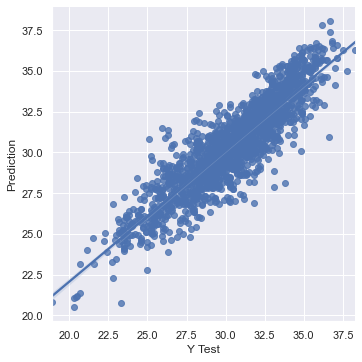

In [165]:
import seaborn as sns; sns.set_theme(color_codes=True)
check = pd.DataFrame({'Y Test':y_test , 'Prediction':pred},columns=['Y Test','Prediction'])
sns.lmplot(x='Y Test',y='Prediction',data=check)
check.head()

### Saving the Model

In [166]:
import pickle
filename="maxtemp.pk1"
pickle.dump(RD,open(filename,"wb"))

In [168]:
# lets load the model & predict
loaded_model=pickle.load(open("maxtemp.pk1","rb"))
result=loaded_model.score(x_test, y_test)
print(result)

0.8055857181106967


In [169]:
test =pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
test

0          1          2          3          4          5     \
Predicted  30.772842  33.650465  26.509782  31.083241  34.220186  33.239802   
Original   32.600000  33.700000  25.500000  30.100000  34.100000  33.100000   

                6          7          8          9     ...       1743  \
Predicted  27.962366  30.048056  27.135075  32.015507  ...  27.525752   
Original   26.200000  31.300000  26.200000  32.200000  ...  28.400000   

                1744      1745       1746       1747       1748       1749  \
Predicted  28.186885  30.88791  31.061404  33.539011  31.750799  30.884241   
Original   30.300000  30.90000  34.000000  34.700000  32.900000  28.900000   

                1750       1751       1752  
Predicted  30.029619  27.163068  31.746234  
Original   30.000000  26.400000  32.100000  

[2 rows x 1753 columns]

# NEXT_TMIN

In [171]:
data.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688     0.328138   
1      2.0          31.9          21.6    52.263397     0.241143   
2      3.0          31.6          23.3    48.690479    -0.724788   
3      4.0          32.0          23.4    58.239788     1.363910   
4      5.0          31.4          21.9    56.174095     0.166275   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  0.135334  0.335598   0.233947  ...   
1         29.850689         24.035009 -0.597376 -0.179506   0.225508  ...   
2         30.091292         24.565633 -0.281493 -1.394218   0.209344  ...   
3         29.704629         23.326177 -0.629003  0.231996   0.216372  ...   
4         29.113934         23.486480 -0.565167  1.276967   0.151407  ...   

   LDAPS_PPT4      lat      lon       DEM     Slope  Solar radiation  \
0   -0.438578  37.6046  126.991  1.838155  1.323365      5992.895996   
1   -0.438578  37.6046  127.032  0.063507 -0.377145      5869.312500   
2   -0.438578  37.5776  127.058 -0.356770 -0.944157      5863.555664   
3   -0.438578  37.6450  127.022  0.092379  1.244837      5856.964844   
4   -0.438578  37.5507  127.135 -0.282668 -0.393616      5859.552246   

   Next_Tmax  Next_Tmin  Date_month  Date_day  
0       29.1       21.2   -0.587885      30.0  
1       30.5       22.5   -0.587885      30.0  
2       31.1       23.9   -0.587885      30.0  
3       31.7       24.3   -0.587885      30.0  
4       31.2       22.5   -0.587885      30.0  

[5 rows x 26 columns]

In [173]:
data.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Date_month', 'Date_day'],
      dtype='object')

In [174]:
## Divide data set into features and label
y = data['Next_Tmin']
x = data.drop(columns=['Next_Tmin'], axis=1)

In [176]:
# lets scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)

In [177]:
maxr2score = 0
maxRS = 0

for i in range (1, 150):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.24, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predlr = LR.predict(x_test)
    r2 = r2_score(y_test, predlr)
    if r2>maxr2score:
        maxr2score = r2
        maxRS = i
print ('Max R2 score obtained is', maxr2score, 'on Random State', maxRS)

Max R2 score obtained is 0.8597428543473484 on Random State 56


In [178]:
# Split the data into train and test. Model will be built on training data and tested on test data.
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.24, random_state=maxRS)
y_train.head()

7724    17.4
5310    25.5
386     23.6
5360    22.8
5544    25.7
Name: Next_Tmin, dtype: float64

In [179]:
x_train.shape

(5550, 25)

In [180]:
x_test.shape

(1753, 25)

### LinearRegression

In [181]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_test=LR.predict(x_test)

print(r2_score(y_test,pred_test))

0.8597428543473484


### Decision Tree Regression

In [182]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_test=DTR.predict(x_test)

print(r2_score(y_test,pred_test))

0.8057935406250303


### RandomForestRegressor

In [184]:
from sklearn.ensemble import RandomForestRegressor
RFR= RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_test=RFR.predict(x_test)

print(r2_score(y_test,pred_test))

0.9157064314753215


### SupportVectorRegressor

In [185]:
from sklearn.svm import SVR
SV= SVR()
SV.fit(x_train,y_train)
pred_test=SV.predict(x_test)

print(r2_score(y_test,pred_test))

0.9139038632153246


### AdaBoostRegressor

In [187]:
from sklearn.ensemble import AdaBoostRegressor
ADR= AdaBoostRegressor()
ADR.fit(x_train,y_train)
pred_test=ADR.predict(x_test)

print(r2_score(y_test,pred_test))

0.8271200099848495


### BaggingRegressor

In [188]:
from sklearn.ensemble import BaggingRegressor
BR= BaggingRegressor()
BR.fit(x_train,y_train)
pred_test=BR.predict(x_test)

print(r2_score(y_test,pred_test))

0.9064027838110522


### GradientBoostingRegressor

In [190]:
from sklearn.ensemble import GradientBoostingRegressor
GBR= GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_test=GBR.predict(x_test)

print(r2_score(y_test,pred_test))

0.9059379535466209


### Cross Validation Score

In [191]:
from sklearn.model_selection import cross_val_score

In [192]:
scr = cross_val_score(LR, X_scaled, y, cv=5, scoring= 'r2')
print("Cross validation score for LinearRegression model:" , scr.mean())

Cross validation score for LinearRegression model: 0.7887042713009171


In [193]:
scr = cross_val_score(DTR, X_scaled, y, cv=5, scoring= 'r2')
print("Cross validation score for Decision Tree Regression:" , scr.mean())

Cross validation score for Decision Tree Regression: 0.5878722098459147


In [194]:
scr = cross_val_score(RFR, X_scaled, y, cv=5, scoring= 'r2')
print("Cross validation score for RandomForestRegressor:" , scr.mean())

Cross validation score for RandomForestRegressor: 0.792787097734798


In [195]:
scr = cross_val_score(SV, X_scaled, y, cv=5, scoring= 'r2')
print("Cross validation score for SupportVectorRegressor:" , scr.mean())

Cross validation score for SupportVectorRegressor: 0.7631369868518569


In [196]:
scr = cross_val_score(ADR, X_scaled, y, cv=5, scoring= 'r2')
print("Cross validation score for AdaBoostRegressor:" , scr.mean())

Cross validation score for AdaBoostRegressor: 0.7389137329473231


In [197]:
scr = cross_val_score(BR, X_scaled, y, cv=5, scoring= 'r2')
print("Cross validation score for BaggingRegressor:" , scr.mean())

Cross validation score for BaggingRegressor: 0.7770247518777986


In [198]:
scr = cross_val_score(GBR, X_scaled, y, cv=5, scoring= 'r2')
print("Cross validation score for GradientBoostingRegressor:" , scr.mean())

Cross validation score for GradientBoostingRegressor: 0.8004645349449164


##### Lets try with some regularize technique

In [200]:
from sklearn.linear_model import Lasso,Ridge

In [201]:
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
predls=ls.predict(x_test)
print(r2_score(y_test,predls))
print('mean_squared_error:',mean_squared_error(y_test,predls))
print('mean_absolute_error:',mean_absolute_error(y_test,predls))
print('root_mean_squared_error',np.sqrt(mean_squared_error(y_test,predls)))

0.8599964560701105
mean_squared_error: 0.9276749033725071
mean_absolute_error: 0.7629134021520981
root_mean_squared_error 0.9631588152389549


In [202]:
rd=Ridge(alpha=0.001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pedi=rd.predict(x_test)
print(r2_score(y_test,pedi))
print('mean_squared_error:',mean_squared_error(y_test,pedi))
print('mean_absolute_error:',mean_absolute_error(y_test,pedi))
print('root_mean_squared_error',np.sqrt(mean_squared_error(y_test,pedi)))

0.8597425979534952
mean_squared_error: 0.9293569879625908
mean_absolute_error: 0.7644875106552554
root_mean_squared_error 0.9640316322416972


##### Cross Validation

In [203]:
scr = cross_val_score(ls, X_scaled, y, cv=5)
print("Cross validation score for Lasso model:" , scr.mean())

Cross validation score for Lasso model: 0.7905014381079561


In [204]:
scr = cross_val_score(rd, X_scaled, y, cv=5)
print("Cross validation score for Ridge model:" , scr.mean())

Cross validation score for Ridge model: 0.7887048099347512


#### Model Evaluation

In [205]:
import math
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [206]:
# LinearRegressor
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_test=LR.predict(x_test)
print("MSE:",mean_squared_error(y_test,pred_test))
print("RMSE:",math.sqrt(mean_squared_error(y_test,pred_test)))
print("MAE:",mean_absolute_error(y_test,pred_test))

MSE: 0.929355289076003
RMSE: 0.964030751104965
MAE: 0.764486349376998


In [207]:
# DecisionTreeRegressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_test=DTR.predict(x_test)
print("MSE:",mean_squared_error(y_test,pred_test))
print("RMSE:",math.sqrt(mean_squared_error(y_test,pred_test)))
print("MAE:",mean_absolute_error(y_test,pred_test))

MSE: 1.2759563140299885
RMSE: 1.1295823626588672
MAE: 0.8340742841213491


In [209]:
#RandomForestRegressor
RFR= RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_test=RFR.predict(x_test)
print("MSE:",mean_squared_error(y_test,pred_test))
print("RMSE:",math.sqrt(mean_squared_error(y_test,pred_test)))
print("MAE:",mean_absolute_error(y_test,pred_test))

MSE: 0.5583975886586705
RMSE: 0.7472600542372585
MAE: 0.5612583950952322


In [208]:
#BaggingRegressor
BR= BaggingRegressor()
BR.fit(x_train,y_train)
pred_test=BR.predict(x_test)
print("MSE:",mean_squared_error(y_test,pred_test))
print("RMSE:",math.sqrt(mean_squared_error(y_test,pred_test)))
print("MAE:",mean_absolute_error(y_test,pred_test))

MSE: 0.6456853272249907
RMSE: 0.8035454730287457
MAE: 0.6081513588356162


In [210]:
#GradientBoostingRegressor
GBR= GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_test=GBR.predict(x_test)
print("MSE:",mean_squared_error(y_test,pred_test))
print("RMSE:",math.sqrt(mean_squared_error(y_test,pred_test)))
print("MAE:",mean_absolute_error(y_test,pred_test))

MSE: 0.6231121299505032
RMSE: 0.7893745181791108
MAE: 0.6181626511702382


In [211]:
#AdaBoostRegressor
ADR= AdaBoostRegressor()
ADR.fit(x_train,y_train)
pred_test=ADR.predict(x_test)
print("MSE:",mean_squared_error(y_test,pred_test))
print("RMSE:",math.sqrt(mean_squared_error(y_test,pred_test)))
print("MAE:",mean_absolute_error(y_test,pred_test))

MSE: 1.150892517595599
RMSE: 1.0727965872408427
MAE: 0.865608965612669


In [212]:
# Lets try with test data score
# RidgeRegressor
rd.score(x_test,y_test)

0.8597425979534952

- Since RidgeRegressor is the best model in terms of model score, cross validation difference, test & train r2 score difference, also as per the evaluation metrics, we choose RidgeRegressor to be the final model. Lets see if we can increase the score by using hyper parameter tuning.

### Hyper parameter tuning

In [213]:
params = {'max_iter' :range(0,25),
              'random_state':range(0,25),
              'solver' : [ 'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}


In [214]:
from sklearn.model_selection import RandomizedSearchCV
RD = RandomizedSearchCV(Ridge(),params,cv=5, n_jobs= -1)
RD.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
                   param_distributions={'max_iter': range(0, 25),
                                        'random_state': range(0, 25),
                                        'solver': ['auto', 'svd', 'cholesky',
                                                   'lsqr', 'sparse_cg', 'sag',
                                                   'saga']})

In [215]:
RD.best_params_

{'solver': 'svd', 'random_state': 19, 'max_iter': 16}

In [216]:
RD = Ridge(solver = 'svd', random_state= 19, max_iter = 16)

In [217]:
RD.fit(x_train,y_train)
pred_test=RD.predict(x_test)
print(r2_score(y_test,pred_test))

0.8594143037076656


In [218]:
## Cross validation score
print((cross_val_score(RD,X_scaled,y,cv=5).mean())*100)

78.90568393829106


- After manually changing the params in hypar parameter tuning, we have increased the CV & Model score to -79% & 86% respectively, which gives the almost same difference before tuning. Hence RidgeRegressor is the best fit model.

##### Lets predict & compare the results

In [219]:
pred=RD.predict(x_test)
pred

array([24.42215573, 24.34505104, 22.15697208, ..., 23.69857816,
       26.28555345, 25.11660716])

Y Test  Prediction
5675    24.6   24.422156
6899    24.6   24.345051
2251    22.5   22.156972
5845    26.5   25.634878
2384    23.4   24.130287

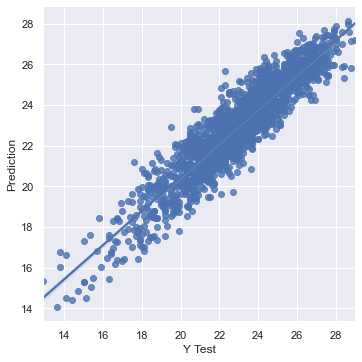

In [220]:
import seaborn as sns; sns.set_theme(color_codes=True)
check = pd.DataFrame({'Y Test':y_test , 'Prediction':pred},columns=['Y Test','Prediction'])
sns.lmplot(x='Y Test',y='Prediction',data=check)
check.head()

### Saving the Model

In [221]:
import pickle
filename="mintemp.pk1"
pickle.dump(RD,open(filename,"wb"))

In [222]:
# lets load the model & predict
loaded_model=pickle.load(open("mintemp.pk1","rb"))
result=loaded_model.score(x_test, y_test)
print(result)


0.8594143037076656


In [223]:
test =pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
test

0          1          2          3          4          5     \
Predicted  24.422156  24.345051  22.156972  25.634878  24.130287  25.530999   
Original   24.600000  24.600000  22.500000  26.500000  23.400000  25.100000   

                6          7          8         9     ...       1743  \
Predicted  25.835884  23.882764  23.340852  20.54682  ...  24.542219   
Original   26.200000  24.400000  22.200000  20.70000  ...  23.500000   

                1744       1745       1746       1747       1748       1749  \
Predicted  25.620628  18.262814  22.007348  23.105051  22.822112  24.267273   
Original   26.500000  17.500000  19.800000  22.300000  22.100000  23.400000   

                1750       1751       1752  
Predicted  23.698578  26.285553  25.116607  
Original   23.200000  26.600000  25.700000  

[2 rows x 1753 columns]